# Closure:  
## A final project on simulating something "like electrons and positrons"

## Objectives:

* Gain familiarity with simulating quantum systems through trotterization
* Using all your accrued skills, implement a novel code on a real device
* Perform statistical analysis on noisy data

This lab is a vain attempt to extend some of the work performed in BLARG to actual machines. I have tried to inject this with as much of the real feel of doing work on quantum algorithms today as possible.  

## The Model: 1+1d $Z_2$ gauge theory with staggered fermionic matter

During Hersh's lecture, he mentioned that one method for studying quantum systems is to construct a model _Hamiltonian_ that we hope will capture the important static and dynamic properties of the system we care about. You are perhaps familar with electromagnetic waves and charged particles.  

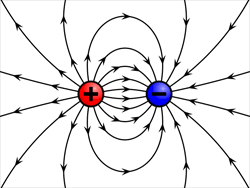

As you probe systems with these degrees of freedom at smaller and smaller scales, you eventually need to consider quantum mechanics.  Then, you become interested in the _quanta_ of each.  Neglecting the nuclei, this becomes a theory about photons ( the quanta of light) and electrons (a quanta of charge).  

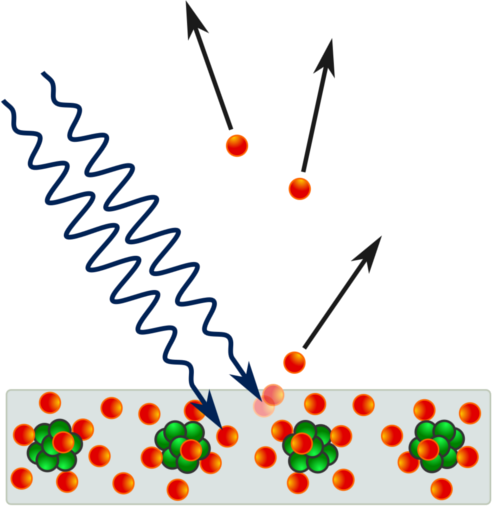

If you want to probe the system at increasing small scales or high energies, consistence of the theory with the theory of relativty will become important.  At this point, you will discover that you are forced to introduce a antimatter (particles with opposite charge, but same mass) into your theory.  At this point, you would be working with Quantum Electrodynamics (QED), the quantum field theory of particles and antiparticles that interact via the photon.

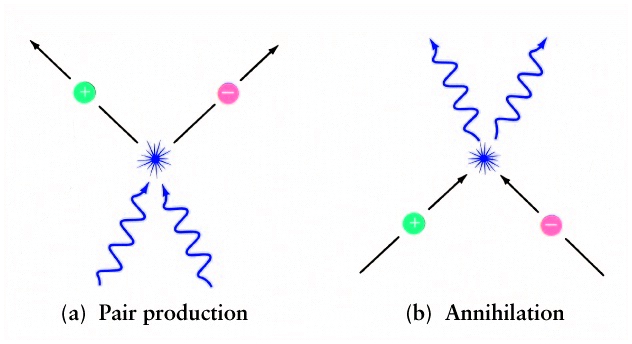

As has been mentioned a few times in this school, many of your instructors work on _lattice field theory_.  This is when you take a quantum field theory, and compute it's properties by discretizing spacetime (This is a relativistic theory, so we got to treat space and time the same) into finite space and time steps.  For technical reasons, the way to place QED on the lattice is to place the electrons and positrons) onto the lattice sites, and the photons onto the links between the sites.  In the example below, I have drawn a 3 dimensional lattice of lengths 4x2x2:

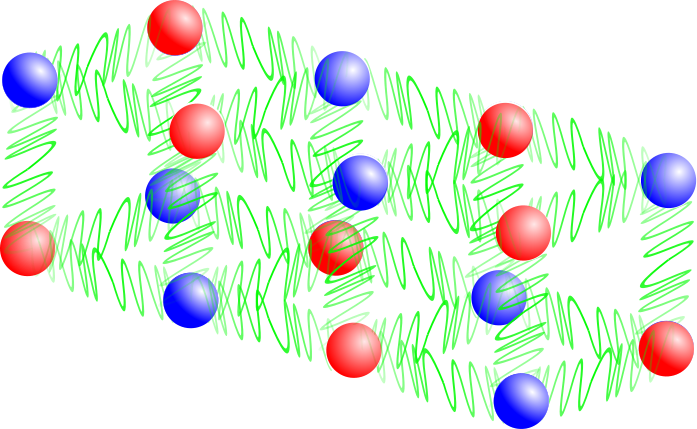

Now, electrons and positrons are both _fermions_ which are particles that aren't allowed to every be in the same place at once. When you discretize spacetime, it turns out there are many ways to represent your fermions on lattice sites.  In this lab, we will take the _staggered_ formulation -- this is heuristically placing electrons and positrons on alternating sites. So any given lattice site has either 0 or 1 fermion.  In contrast, photons are _bosons_ which can have as many of themselves in any place at once.  The result of this (with an additional complication) is that each link of the lattice should be able to store a complex number-- a much larger computational cost!

Let's take a crack at estimating the computational resources need to do a lattice QED (LQED) calculation:

In [1]:
#We live in 3 space and 1 time dimension, so lets make a variable
#to sort the spacetime dimension, d= (space dimensions)+(time dimensions)
space_dimensions = 3
time_dimensions = 1
d = space_dimensions + time_dimensions

#Now, lets consider the length of one side of our hypercube.  These days, its not uncommon to have
#lengths, L, of over 100 sites.  Let's use that as our estimate and sort it as L
L = 100

#With these numbers, we should have L**d lattice sites.  Lets store this as N_s.
#Notice how quickly this grows with large numbers of dimension
N_s = L**d

#Now, for each lattice site, we can assign d links uniquely to it, in order to
#determine N_l=d*N_s, the total number of links
N_l = d*N_s

#For each lattice site, we need 1 bit, while for each lattice link we will take 64-bit double precision numbers
#and since we need a complex number, we need 2 of them, so N_lbits=128 bits are required for each link.
N_lbits = 128 

# So the total number of bits is N_bits=N_s+N_lbits*N_l
N_bits = N_s + N_lbits * N_l

#To roughly convert to gigabytes, N_gb, we divide N_bits by 8*1e9
N_gb = N_bits / (8*1e9)

#At this point, print out your estimate for the number of gigabytes,
#and number of bits to do store this LQED simulation:
print("Number of Gigabytes: ", N_gb)
print("Number of Bits: ", N_bits)

Number of Gigabytes:  6.4125
Number of Bits:  51300000000


* What do you think of these numbers?  
* Are they large or small compared to your computer's memory?  
* Do you think you could perform a calculation of this size on your computer?

Now for the obvious question:
* <b>How does this compare to the size of existing quantum computers?</b>

Presumably, you realize that quantum devices, even if noiseless, are currently far to small to do a comparable calculation today.  This is were approximating our model of QED can come in.  By chosing different parameters, perhaps we can get down to a size tractable on todays machines.

*In the cell below, try and find some set of parameters that requires less than say, 10 qubits.  Thats something we could dream about running in the next few years. <b>Helpfully on a quantum computer, we typically only need to store the _space_ lattice </b>, so we need 1 less dimension than the classical computer.

In [2]:
#Maybe we don't work in 3 space dimensions initally?
space_dimensions = 1
d = space_dimensions

#Maybe we don't use quite as large of a box?
L = 10

#We can't really change the number of sites or links once we specify dimension and length
N_s = L**d
N_l = d*N_s

#For each lattice site, we need 1 bit, so we can't really reduce this without just removing
#the electrons and positrons from the theory.  That seems like an extreme approximation!!! Probably
# best not to do that.
N_lbits = 64
N_bits = N_s + N_lbits * N_l

#On the other hand, those 2 64-bit double precision numbers for the photons are pretty expensive, 
#perhaps we can do something to reduce them?

#To roughly convert to gigabytes, N_gb, we divide N_bits by 8*1e9
N_gb = N_bits / (8*1e9)

#At this point, print out your estimate for the number of gigabytes,
#and number of bits to do store this LQED simulation:
print("Number of Gigabytes: ", N_gb)
print("Number of Bits: ", N_bits)

Number of Gigabytes:  8.125e-08
Number of Bits:  650


So what did you discover?  Probably that we have to do some pretty extreme approximations to get to something below ten qubits.  In order to run something on a real device, we will be making the making the most extreme of these approximations, setting the number of space dimensions to 1 (so we are working with 1+1d theory were the first number counts space dimensions and the second counds time dimensions.)  Further, we will only be taking  2 lattice sites into account.  So our picture has changed from the one above to:

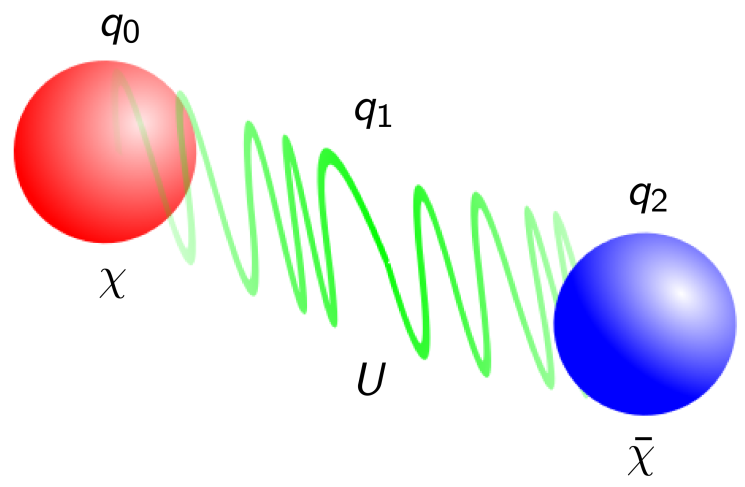


While physicists know pretty well how lowering the number of dimensions and the length of the box effect our results, it is in fact a relatively open question about how reducing the number of qubits per photon link effects our predictions (Many of your instructors spend inordinant amounts of time studying this _digitization_ question)

Because the photon link can be represented by a complex number (for the mathematically minded, its related to the $U(1)$ group), its possible to think of its value as taking values on circle (the left in the picture):

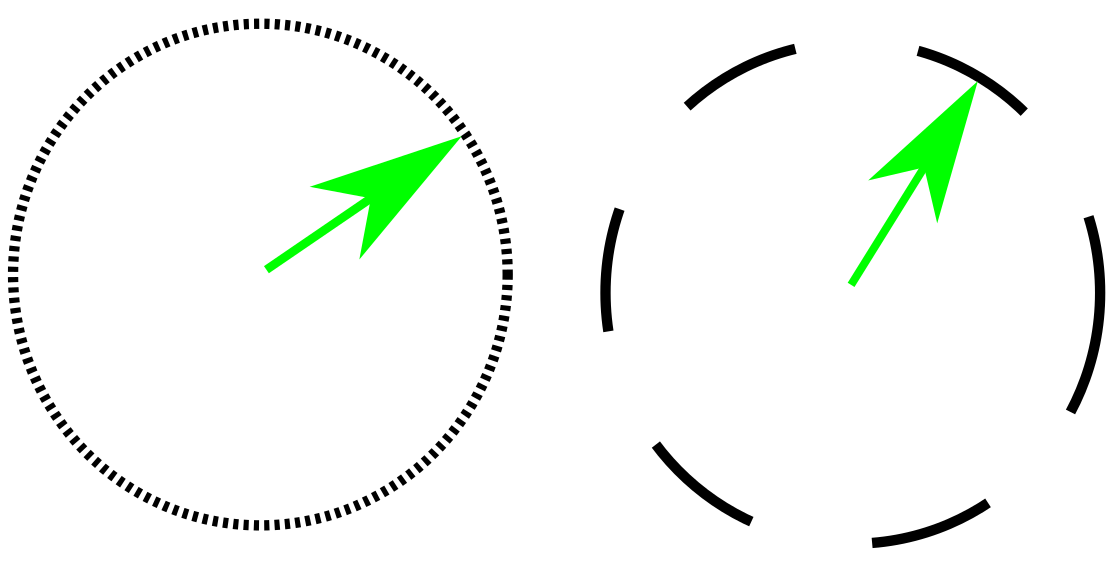

One way to reduce the number of qubits needed for the photon link, which I have a particular affinity for, is to replace the circle on the left by a finite set of evenly selected points on it (picture on the right).  In this situation, we are formally replacing the U(1) group by the $Z_n$ group, where $n$ is the number of points on the circle.  In this way, you can imagine reducing the number of qubits from 2 complex numbers to a single integer, $n$.  In this lab, we will take the maximally harsh approximation of replacing the nearly continuous circle by 2 points, leading to the $Z_2$ part of the title.  In this approximation, we can represent the photon by a single qubit.

So all together, the model we will consider in this lab _1+1d $Z_2$ gauge theory with staggered matter_ will involve 1 electron, 1 positron, and 1 $Z_2$-valued photon.  This leads to <b>a system of 3 qubits</b>, and we will need 1 additional ancilla qubit in order to perform some of the time-evolution.

## The Hamiltonian

The lattice Hamiltonian for this model is

$$H = \frac 1 2 \sigma^{(x)} + 2 \bar{p}\sigma^{(z)}e
-m\bar p p +m\bar{e}e$$
where 

* $i$ denote lattice sites
* $e$ is a one-component electron
* $p$ is a one-component positron
* $\bar{e}$ and $\bar{p}$ indicate their complex conjugate transpose 
* $\sigma$ is the photon, with the superscript indicated which basis it is acted on in
* The sum is taken over all pairs of adjacent sites
* The first term is the kinetic energy for the photon
* The second term is the kinetic energy for the electron/positron--which in the lab we call a hopping term
* The final term gives the electron or positron a mass, $m$


Using the something called <b>Jordan-Wigner procedure</b>, we translate from the fermions into a set of bosons.  This allows us to right the Hamiltonian above nicely in terms of gates:
$$
H = \frac{m}{2}Z_{e}-\frac{m}{2} Z_{p}
+X_{\gamma}+\frac{1}{4}Z_{\gamma} \left(X_{e}X_{p}+Y_e Y_{p}\right)
$$

The subscripts indicate which of the 3 qubits a given gate is acting on (the electron $e$, the positron $p$, or the photon $\gamma$)

## Time Evolution

With this Hamiltonian, we could act on a state $|\psi\rangle$ in the Schrodinger equation:

$$i\partial_t |\psi(t)\rangle=H |\psi(t)\rangle$$

Now remember, $H$ isn't a unitary matrix, its only Hermitian.  This means we can't use it trivally on a quantum computer. If we want to time evolve a give state $|\psi_0\rangle$, we should follow Hersh's lectures and use the time evolution operator $U=e^{-iHt}$ to get

$$ |\psi(t)\rangle = U|\psi_0\rangle=e^{-iHt}|\psi_0\rangle$$

Thinking back to Hersh's lecture, we remember that $H$ often has non-commuting terms, which prevents the gate $U$ from being efficiently built into a circuit.  The method of _trotterization_ allows us approximate the $U$ in a way that is efficient.  In our case, there are 3 terms in our Hamiltonian:

$$ H = H_{kg} + H_{fh} + H_{m} $$

* $H_{kg}$ is the kinetic term for the photon
* $H_{fh}$ is the fermionic hopping term
* $H_{m}$ is the fermionic mass terms

In this case, we can approximate $U$ by:

$$\Large U=e^{-iHt}\approx \left(e^{-iH_{kg}\epsilon}e^{-iH_{fh}\epsilon}e^{-iH_{m}\epsilon}\right)^{t/\epsilon}+O(\epsilon^2)\equiv (U_\epsilon)^{N} $$
where $N=t/\epsilon$ is the number of time steps we want to use. With this, we can now write $U_\epsilon$ in terms of gates:

$$\Large{ U_{\epsilon}=e^{-iH_{kg}\epsilon}e^{-iH_{fh}\epsilon}e^{-iH_{m}\epsilon}
\\     =e^{-i\epsilon X_\gamma}e^{-i\frac{\epsilon}{4}Z_{\gamma} \left(X_{e}X_{p}+Y_e Y_{p}\right)}e^{-i(-1)^j m \epsilon Z_j} }$$
where $j={e=0,p=1}$
Now, the first and last gates should look familar to you as general rotation gates in the $X,Z$ directions:

$${ e^{-i\epsilon X_\gamma}=RX(-\epsilon/2)
    \\e^{-i(-1)^j m \epsilon Z_j}=RZ((-1)^{j+1}m\epsilon ) } $$

The final term, fermion hopping $U_{fh}$, is by far the hardest and most non-trivial gate.  In fact, it order to implement it, you need an ancilla qubit to perform the phase kickback correctly.  In the interest of brevity, I will just tell you that the gate is.  

For the $XZX$ term, you diagonalize the fermions into the $X$ basis using $H$, apply CNOTs to the ancilla with the control being the electron, photon, and positron, perform a $RZ(-(-1)^j\epsilon/4)$ the redo the CNOT and $H$ gates.  

Fror the $YZY$ term, we do the same thing except the 

$$U(\phi,\theta,\lambda)=RZ(\phi)𝑅X(−\pi/2)RZ(𝜃)RX(\pi/2)𝑅𝑍(\lambda)$$

gate is used to diagonalize, with $\phi=\lambda=-\pi/2$ and $\theta=\pi/2$.  Unlike the Hadamard for which $H^{-1}=H$, To reverse the $U(-\pi/2,\pi/2,-\pi/2)$, we need to use $U(\pi/2,\pi/2,-\pi/2)$

Defining a gate $RZ3$ as the collection of CNOTs and the $RZ$ gate, this gate looks like:

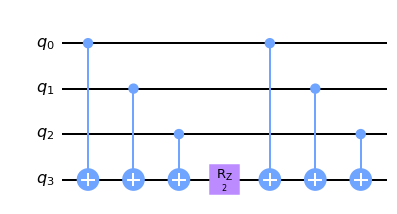

from which we can get the $U_{fh}$ as:

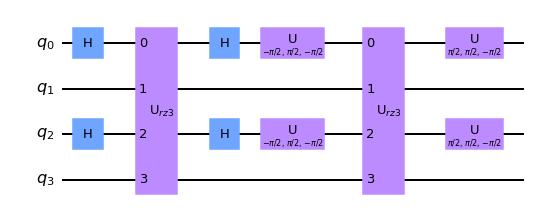

## ...Ready for it? 

So first of, lets of course set up all the imports that we need:

* numpy
* import everything from qiskit
* Make sure you have $\pi$

In [3]:
import numpy as np
from qiskit import IBMQ, Aer, assemble, transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from numpy import pi

Next, you neeed to load your IBMQ account, and set your provider to our `qjs-for-hep` project.  Finally, use the command

    provider.backends()
to look at all the computers 'available' to you (Note, 'ibmq_16_melbourne' isn't actually accessible)

Keep this list for later

In [4]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')
provider.backends()

[<IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')>,
 <IBMQBackend('ibmq_casablan

While we are only going to simulate the 2-site (4 qubit) model, the code we are going to write will be general enough that if you had a better quantum computer, you would be able to trivially rerun our model for a larger number of sites.  For this reason, we need to define the basic parameters of the theory we are interested in.  There are three:

* `N` which is the number of sites of the lattice (The total number of qubits is 2N = N sites + N-1 links + 1 ancilla).  Set this to 2.
* `epsilon` which is the trotterized time step.  For now, set this to 0.5.
* Besides these numerical parameters, there is a physical parameter `m` which determines the mass of the electron and positron.  For now, set this to 0.10.

In [5]:
# Number of sites
N = 2
epsilon = 0.5
m = 0.10

## Gauge Kinetic Gate
For our first task, lets create a function that will creat the gauge kinetic gate.  This function should take in `epsilon` and return a gate $U_kg$ that can be appended to a quantum circuit later.

While there is some setup and clean up lines of code you need to use, the important part is that the gate the should be returned should be:

$$RX(-\epsilon/2)$$

In [10]:
#define gauge_kinetic to take in only epsilon
def gauge_kinetic(epsilon):
    qc = QuantumCircuit(1)
    theta = -epsilon/2
    qc.rx(theta, 0)
    ukg = qc.to_gate()
    ukg.name = 'Rx'
    
    return ukg

In the next cell, create a circuit and test that your implementation for gauge_kinetic works by drawing the circuit.  Remember that when using `append` to add gates, you need to pass in also a list of qubits to apply it to.

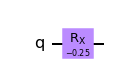

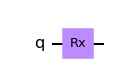

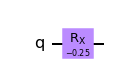

In [11]:
%matplotlib inline
qubit_list = [0]
qc = QuantumCircuit(1)
ukg = gauge_kinetic(epsilon)
qc.append(ukg,qubit_list)
qc.draw()
qc.decompose().draw()

Before proceeding, you might notice that while this circuit properly prints $U_kg$, it doesn't tell you if $U_kg$ is doing what you want.  If instead of `draw()`, you use `circuit.decompose().draw()` to reduce your gates to more standard ones.

## Fermion mass gate

For the `fermion_mass` function we can mostly repeat the syntax used for the `gauge_kinetic` to create another gate.  In this case we want to do:

$$RZ((-1)^{j+1}m\epsilon ) $$

For this function, take in `epsilon`, `mass`, and `eta`.  The `eta` will be used pass into the circuit the value $(-1)^{j+1}$

In [12]:
def fermion_mass(epsilon, mass, eta):
    qc = QuantumCircuit(1)
    qc.rz((-eta*mass*epsilon), [0])
    fm = qc.to_gate()
    fm.name = "Rz"
    return fm

Again, it's important to _unit test_ each function before proceeding.  So implement a test circuit for `fermion_mass` where you pass in the stored variables, and for `eta` use 1

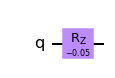

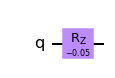

In [13]:
eta = 1
qubit_list = [0]
qc = QuantumCircuit(1)
fm = fermion_mass(epsilon, m, eta)
qc.append(fm, qubit_list)
qc.decompose().draw()

## Fermion hopping term

Now for the complicated set of gates.  Program a function that will return a gate that does

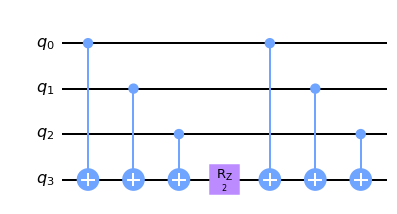

This function `rz3` needs to take in an angle `theta` and return `U_rz3`.  To work correctly, you will need to create a circuit inside this function with 4 qubits

In [14]:
def rz3(theta):
    qc = QuantumCircuit(4)
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.rz(theta, 3)
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    U_rz3 = qc.to_gate()
    U_rz3.name = "the complicated set of gates (urz3)"
    return U_rz3

Now that we have a very complicated gate, we should definitely test it, decompose the gate, and draw it to check.  For the argument of `rz3` pass it `-2*epsilon`

Hopefully this exactly agrees with the circuit above.

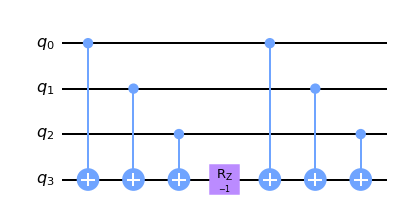

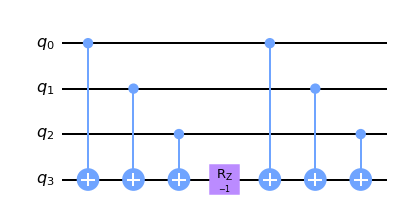

In [15]:
qubit_list = [0,1,2,3]
qc = QuantumCircuit(4)
U_rz3 = rz3(((-2)*(epsilon)))
qc.append(U_rz3, qubit_list)
qc.decompose().draw()

The final gate we need is the $U_{fh}$, which is built from the $RZ3$.  This function should take in `epsilon` and `eta`
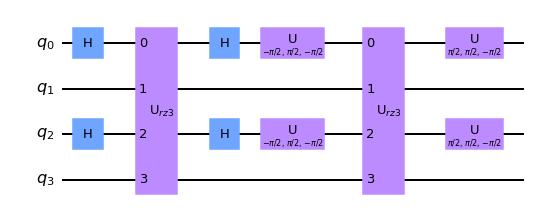

You also need Hadamard around 1 of the $RZ3$ gates and U gates around the other.  For arguments, the $RZ3$ gate should take in `-epsilon/4*eta`.  Remember that to use self-made gates, you need to use `circuit.append(gate,list_of_qubits_acted_on)`

<b>Remeber that the U gate is not its own inverse, so you need to modified the uncompution step of the U</b>

In [16]:
def gross_gate(epsilon, eta):
    qc = QuantumCircuit(4)
    qc.h(0)
    qc.h(2)
    qubit_list = [0,1,2,3]
    U_rz3 = rz3((-epsilon)/(4*eta))
    qc.append(U_rz3, qubit_list)
    qc.h(0)
    qc.h(2)
    qc.u((-pi/2), (pi/2), (-pi/2), 0)
    qc.u((-pi/2), (pi/2), (-pi/2), 2)
    qc.append(U_rz3, qubit_list)
    qc.u((pi/2), (pi/2), (-pi/2), 0)
    qc.u((pi/2), (pi/2), (-pi/2), 2)
    grossgate = qc.to_gate()
    grossgate.name = "ufh"
    return grossgate

Obviously, time to test.  Pass in `epsilon` and for `eta` use 1.

When you draw with `circuit.decompose().draw()`, we only decompose one level.  If we string decomposes together, `circuit.decompose().decompose()`, then we will decompose to an additional level. 

* First, decompose only once, and check that you agree with the picture you were expecting
* Decompose twice, and see what the $U_{fh}$ looks like in terms of fundamental gates

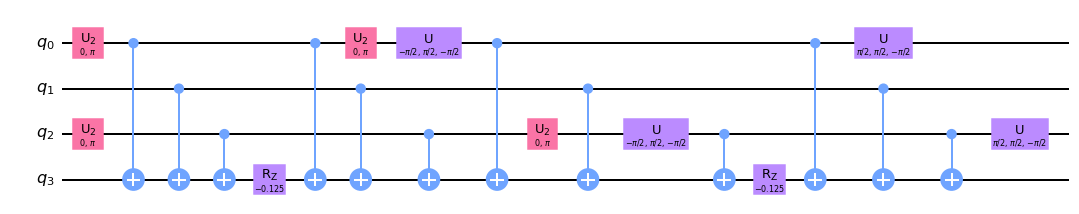

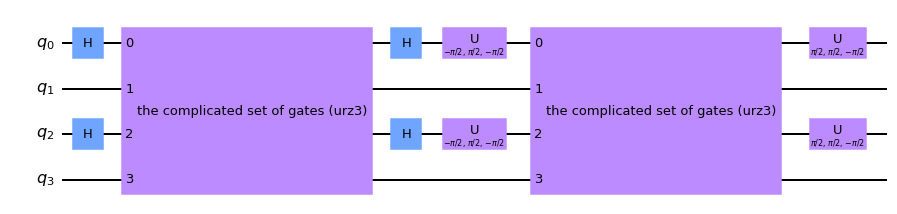

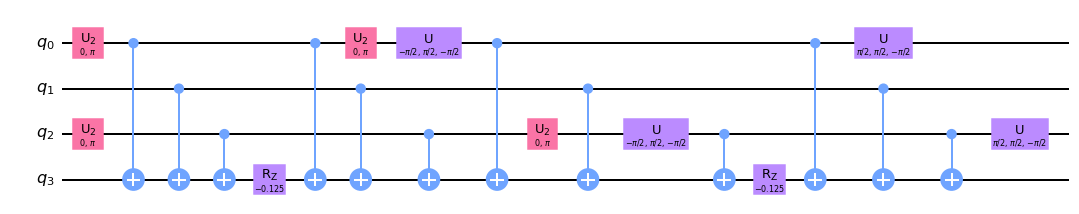

In [17]:
qc = QuantumCircuit(4)
qubitlist= [0,1,2,3]
grossgate = gross_gate(epsilon, eta)
qc.append(grossgate, qubitlist)
qc.decompose().draw()
qc.decompose().decompose().draw()

Clearly, $U_{fh}$ is much more expensive to implement than the $U_{kg}$ or $U_{fm}$.  Before we proceed to putting the entire circuit together, lets try and perform some benchmarking on this gate alone.  First, lets just run the gate once on a simulator and real machine to see how it works. 

* To do this, create a QuantumCircuit with 4 qubits and 4 classical bits, apply your fermion_hopping gate with `epsilon` and `eta=1`.
* Run and get the counts output from the `qasm_simulator` as your backend with `Aer.get_backend()`.  Store the counts of your result in `sim_results`
* Rerun with a real device, store the counts of your results in `real_results`
*Because changing machines can change the noise dramatically, instead of using `least_busy` you should choose a single backend from the list above with the command `backend = provider.get_backend('name_of_backend')`. Because we need 4 qubits, you should only choose from: `ibmq_belem`, `ibmq_casablanca`, `ibm_lagos`, `ibm_nairobi`, `ibmq_bogota`, `ibmq_santiago`, `ibmq_manila`, `ibmq_jakarta`, `ibmq_quinto`, or `ibmq_5_yorktown`

<b>Different machines get used more or less heavily, so your choice could make substantially change the time it takes.  Anecdotal evidence suggest that `ibmq_belem` or `ibm_lagos` would be quickest</b>
   

In [19]:
qubitlist = [0,1,2,3]
qc = QuantumCircuit(4,4)
grossgate = gross_gate(epsilon, eta)
qc.append(grossgate, qubitlist)
qc.measure_all()

simbackend = Aer.get_backend("qasm_simulator")
transpiled = transpile(qc, backend=simbackend)
qobj = assemble(transpiled)
results = simbackend.run(qobj).result()
sim_results = results.get_counts()

ibmqfactory.load_account:WARNING:2021-07-23 20:42:19,523: Credentials are already in use. The existing account in the session will be replaced.


backend:  ibm_lagos
Job Status: job has successfully run
real results: {'0000 0000': 637, '0001 0000': 154, '0010 0000': 1, '0011 0000': 3, '0100 0000': 112, '0101 0000': 21, '1000 0000': 33, '1001 0000': 26, '1010 0000': 3, '1011 0000': 4, '1100 0000': 20, '1101 0000': 10}
sim results: {'0000 0000': 1024}


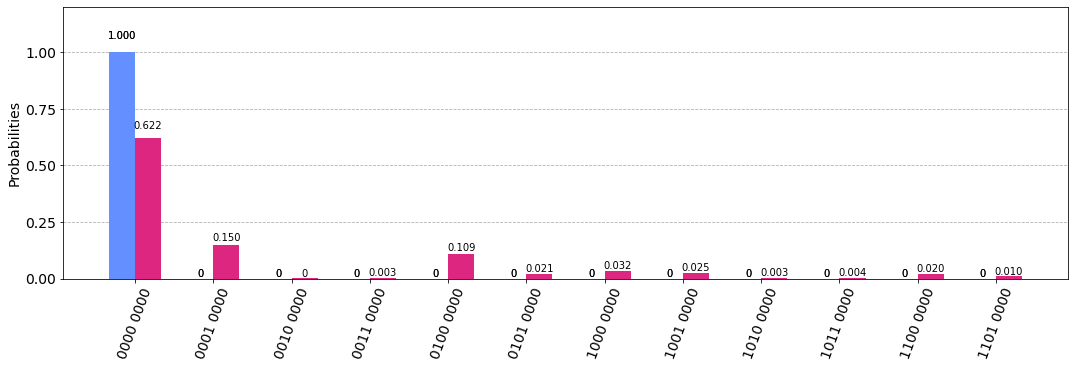

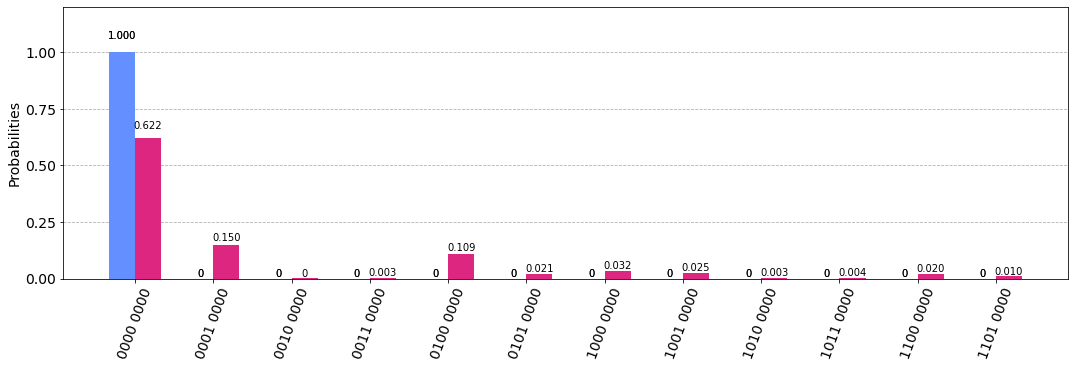

In [20]:
#If you call plot_histogram with a list [results1,results2,results3,...],
#you can plot multiple data sets side by side for comparision.  Do this for 
#sim_results vs real_results.  How does the real device compare for this one step?
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')
backend = provider.get_backend('ibm_lagos')
print("backend: ", backend)

shots = 1024
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job, interval=2)
real_results = job.result().get_counts()

print ("real results:", real_results)
print ("sim results:", sim_results)

plot_histogram([sim_results, real_results], figsize=(18, 5))

Ponder for a moment, can I read off from this histogram all the information about the error rate of the $U_{fh}$ gate?  Are there reasons to think this analysis was inadequate?